# 简介
产出不是每个词的概率（虽然是前溃神经网络），而是词向量（word embedding），可以计算词之间的相似度，这个思路就可以用在很多方面了，比如说推荐

包括2个重要的模型：CBOW（给定上下文，中心词出现概率）与Skip-gramm（给定中心词，一定距离内，词o出现概率）

训练：Hierarchical Softmax + Huffman树;Negative Sampling（速度更快，logloss）

# Ref
两篇原始论文：Efficient Estimation of Word Representations in Vector Space，Recurrent Neural Net Language Model，理解上难度有点大

word2vec Parameter Learning Explained，xingrong的，相对容易理解

word2vec的C代码：https://github.com/tmikolov/word2vec/blob/master/word2vec.c 方便理解，还可以参考： https://blog.csdn.net/google19890102/article/details/51887344


https://blog.csdn.net/shuihupo/article/details/81540433 切词工具对比(选择jieba：https://github.com/fxsjy/jieba)

https://radimrehurek.com/gensim/ gensim参考，Documentation

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import jieba
from gensim.models import word2vec

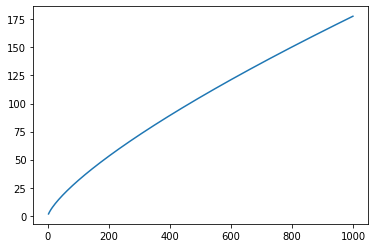

In [93]:
# CPP代码中：负采样中频率，
x = np.random.rand(1000) * 1000
x.sort()
y = [math.pow(i, 0.75) for i in x]
fig, ax = plt.subplots()
ax = plt.gca()

ax.plot(x, y)
plt.show()

In [94]:
# jieba测试：参考：https://github.com/fxsjy/jieba 
jieba.enable_paddle()# 启动paddle模式。 0.40版之后开始支持，早期版本不支持，深度学习框架
strs=["我来到北京清华大学","乒乓球拍卖完了","中国科学技术大学"]
for str in strs:
    seg_list = jieba.cut(str,use_paddle=True) # 使用paddle模式
    print("Paddle Mode: " + '/'.join(list(seg_list)))

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

Paddle enabled successfully......
2020-11-25 22:20:25,911: DEBUG: Paddle enabled successfully......


Paddle Mode: 我/来到/北京清华大学
Paddle Mode: 乒乓球/拍卖/完/了
Paddle Mode: 中国科学技术大学
Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造


In [111]:
# 默认模式切词
with open("三国演义.txt") as fp:
    doc_cut  = jieba.cut(fp.read())
    # 保存到本地
    with open("三国演义_cut.txt", 'w') as fp_w:
        fp_w.write(" ".join(doc_cut))

In [112]:
import logging
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)
# 别被切碎了
jieba.suggest_freq('邢道荣', True)
jieba.suggest_freq('二弟', True)
jieba.suggest_freq('三弟', True)
jieba.suggest_freq('云长', True)
jieba.suggest_freq('翼徳', True)
jieba.suggest_freq('子龙', True)
jieba.suggest_freq('公瑾', True)
jieba.suggest_freq('袁绍', True)
jieba.suggest_freq('孙夫人', True)
jieba.suggest_freq('刘玄德', True)
jieba.suggest_freq('玄德', True)
jieba.suggest_freq('曹孟德', True)
jieba.suggest_freq('孔明', True)
jieba.suggest_freq('诸葛孔明', True)
jieba.suggest_freq('关云长', True)

48

In [116]:
# 按行读取文件 
sentences = word2vec.LineSentence("三国演义_cut.txt")
# 参考：https://radimrehurek.com/gensim/models/word2vec.html,搜索：gensim.models.word2vec.Word2Vec

# 负采样
xingdaorong_model = word2vec.Word2Vec(sentences, hs=0, min_count=5,window=5)  
xingdaorong_model.save("xingdaorong_word2vec.model")

2020-11-25 22:22:08,574: INFO: collecting all words and their counts
2020-11-25 22:22:08,575: INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-25 22:22:08,656: INFO: collected 48788 word types from a corpus of 399470 raw words and 1583 sentences
2020-11-25 22:22:08,657: INFO: Loading a fresh vocabulary
2020-11-25 22:22:08,677: INFO: effective_min_count=5 retains 7671 unique words (15% of original 48788, drops 41117)
2020-11-25 22:22:08,678: INFO: effective_min_count=5 leaves 339912 word corpus (85% of original 399470, drops 59558)
2020-11-25 22:22:08,698: INFO: deleting the raw counts dictionary of 48788 items
2020-11-25 22:22:08,702: INFO: sample=0.001 downsamples 31 most-common words
2020-11-25 22:22:08,702: INFO: downsampling leaves estimated 235148 word corpus (69.2% of prior 339912)
2020-11-25 22:22:08,713: INFO: estimated required memory for 7671 words and 100 dimensions: 9972300 bytes
2020-11-25 22:22:08,714: INFO: resetting layer weights
2020-11-2

In [117]:
for key in xingdaorong_model.wv.similar_by_word('玄德', topn =100000):
    if len(key[0]) < 10 and len(key[0]) >= 2: 
        if key[1] >= 0.9:
            print(key[0], key[1])
        

2020-11-25 22:22:14,725: INFO: precomputing L2-norms of word weight vectors


孔明 0.9518522024154663
关公 0.9493459463119507
维大惊 0.938915491104126
吕布 0.9350227117538452
周瑜 0.9332243204116821
孟获 0.9316806793212891
曹仁大 0.931252121925354
大惊 0.927707314491272
先主 0.9275193214416504
曹真 0.9263907670974731
少顷 0.9239822626113892
二人 0.9236937165260315
匆匆 0.9232163429260254
计引兵 0.9226945042610168
吕布见 0.9225378036499023
那里 0.9216679334640503
回寨 0.9212357997894287
傅司马孚 0.9208981394767761
来战 0.9199955463409424
杨锋 0.9199569821357727
收军 0.9190149307250977
张悌 0.9188086986541748
哀告 0.9188061356544495
孔明谓 0.9185016751289368
曹髦 0.9183349609375
姜维 0.9181143045425415
张邈 0.917864203453064
曹操 0.9178026914596558
徐州 0.9174515008926392
未信 0.9166995286941528
回音 0.916517972946167
应诺 0.9151455163955688
抱头鼠窜 0.9144845008850098
操大惊 0.914412796497345
领命 0.9141969680786133
马超 0.9138268232345581
受计 0.913736879825592
使者 0.91307532787323
于是 0.9127552509307861
操教 0.9122517108917236
一骑 0.912178635597229
骇然 0.9121590852737427
孙乾 0.9120049476623535
不多时 0.9116429090499878
下马 0.9115134477615356
程远志 0.911396

In [115]:
# 计算相似度
xingdaorong_model.similarity('玄德', '云长')

/home/hdw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


0.7934135